In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=4, random_state=42)

In [3]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [4]:
df

,Feature_1,Feature_2
0,-2.282534,-9.692815
1,-6.147668,1.755990
2,13.399091,-1.260023
3,-4.077630,3.160226
4,9.444735,0.340868
...,...,...
495,-1.282205,-3.181575
496,-2.817604,10.378894
497,3.296740,8.649256
498,-8.970519,-2.684073


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [6]:
inertia = []
K_range = range(1, 11)

In [8]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [9]:
inertia

[999.9999999999992,
 528.8064432605647,
 294.4377068678187,
 250.45524696534443,
 216.88110656982604,
 185.274406751959,
 156.70879996290444,
 135.62603453115247,
 129.10396348239811,
 119.9410129710499,
 999.9999999999992,
 528.8064432605647,
 294.4377068678187,
 250.45524696534443,
 216.88110656982604,
 185.274406751959,
 156.70879996290444,
 135.62603453115247,
 129.10396348239811,
 119.9410129710499]

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

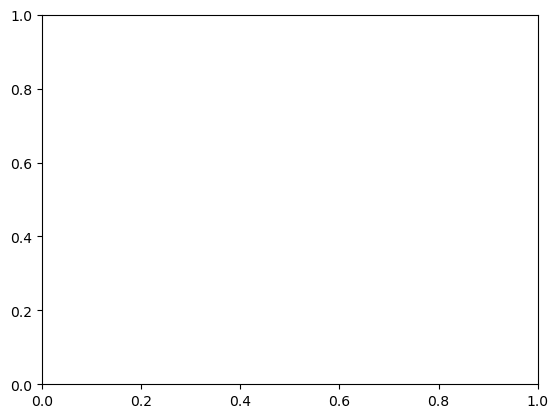

In [10]:
plt.plot(K_range, inertia, marker='o')

In [11]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [12]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
